# KnapsackV2
1BM120

## Part 0: Load libraries 

In [7]:
!pip install gym
!pip install or_gym

    Import the neccary packages
- `Numpy` for our Qtable
- `OpenAI Gym` for our FrozenLake Environment
- `Random` to generate random numbers
- `Deque` to record cumulative reward over multiple episodes
- `MatPlotlib` to generate plots

In [8]:
import numpy as np
import gym
import or_gym
import random
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Explore Knapsack

 **Task 1:** 
- Create an instance of the environment
- Render the environment 
- Print the state and action space

In [9]:
env = or_gym.make("Knapsack-v2") # Create an  instance of the environment 

In [10]:
env.render()# render the environment 
env.mask = False

NotImplementedError: 

##### The agent moves through a $X\times X$ gridworld

The agent has X potential actions:


In [20]:
print(env.reset())

0


In [21]:

state_space = env.reset()#env.observation_space.n#Get number of states in an environment 
action_space = env.action_space.n#env.action_space.n#Get number of actions in an environment 
print('Action space', action_space)
print('State space', state_space)

Action space 4
State space 16


Other important points of the environvment:
- The episode ends when you reach the goal or fall in a hole. 
- Agent receives a reward of 1 if it reach the goal, and zero otherwise.
- FrozenLake-v0 is considered "solved" when the agent obtains an average reward of at least **0.78 over 100** consecutive episodes.

**Task 2:**
- Sample an action from the environment.
- Call the step function and inspect the outputs.

In [22]:
action = env.action_space.sample()# sample an action from the env instance
print(action)

0


In [23]:
env.step(action)# call the step function of the env. and inspect quadruple of (state, reward, done, info)

(0, 0.0, False, {'prob': 0.3333333333333333})

**Task 3:**
- Randomly interact with the envrionment for two episodes.  

In [24]:
for episode in range(2):
    state = env.reset()# get the starting state from the env.
    step = 0
    done = False
    print("EPISODE ", episode)
    for step in range(99): 
        action = env.action_space.sample()# sample an action from the environment  
        new_state, reward, done, info = env.step(action) #give the action to environment to obtain reward, and next state,   
        if done: #if the goal state is reached or agent fall into hole. 
            env.render() #print the last stay
            if new_state == 15:
                print("We reached our Goal 🏆")
            else:
                print("We fell into a hole ☠️")
            
            # We print the number of step it took.
            print("Number of steps", step)
            
            break
        state = new_state
env.close()

EPISODE  0
  (Down)
SFFF
FHFH
FFFH
HFFG
We fell into a hole ☠️
Number of steps 1
EPISODE  1
  (Right)
SFFF
FHFH
FFFH
HFFG
We fell into a hole ☠️
Number of steps 9


## Part 2: Q-Table 🗄️
We will implement Q-learning algorithm to devise optimal policy for FrozenLake environment. 

**Task 4**
- Create Q-table with `state space` as rows and `action space` as columns.
state =16  action=4

In [25]:
qtable = np.zeros((state_space, action_space))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Part 3: The Q learning algorithm 🧠
It is fine if you do not understand all the details at this point. Q-learning will be introduced in Lecture 3 of DRL part. 



Q learning is a off-policy algorithm. Meaning that the actions that are executed are different from the target actions that are used for learning. 
Epsilon-greedy policy – most likely selects the `greedy actions` but can select `random actions` too 
- Ensures explorations
- Choose greedy action with 1- є (epsilon) 
- Choose random action with є (epsilon)

In [26]:
def epsilon_greedy_policy(Q, state, epsilon): 
      # Q:          : state-action pair
      # State (int) : current state
      # eps (float): epsilon
    action = 0
    if random.uniform(0, 1) > epsilon: #exploitation
        action = np.argmax(Q[state,:])
    else: #exploration 
        action = env.action_space.sample()
    return action


The algorithm takes nine arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `total_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `max_step`: This is the max number of interactions between agent and env. within a single episode.  
- `epsilon`: This is to encourage exploration. Epsilon is decayed over time to discourage explortation and encourage exploitation once agent has explored different state. 
- `max_epsilon`: This is the maximum value of epsilon. 
- `min_epsilon`: This is the minimum value of epsilon. 
- `decay_rate`: This is the decay rate for epsilon. 
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `plot_every`: This is additional argument to plot the cumulative reward against episodes. 

The algorithm returns as output:
- `qtable`: This is an ndarray where `qtable[s][a]` is the estimated action value corresponding to state `s` and action `a`.

**Task 5**
- Fill the missing code to complete the Q-learning implementation.
- Write a condition to break the loop as soon as agent receives a reward of 0.78 or higher in 100 consecutive episodes.

In [27]:
def q_learning(env, total_episodes, max_steps = 99, epsilon = 1.0, max_epsilon = 1.0, min_epsilon = 0.01, decay_rate = 0.005,  gamma=0.95, plot_every=100):
    rewards = []   # List of rewards
    tmp_scores = deque(maxlen=plot_every)     # deque for keeping track of scores
    avg_scores = deque(maxlen=total_episodes)   # average scores over every plot_every episodes
    for episode in range(total_episodes):
        state = env.reset()#Reset the environment to the starting state 
        #step = 0 
        done = False
        total_rewards = 0 # collected reward within an episode
        if episode % 100 == 0: #monitor progress
            print("\rEpisode {}/{}".format(episode, total_episodes), end="") 
        
        for step in range(max_steps): 
            action = epsilon_greedy_policy(qtable, state, epsilon)# call the epsilon greedy policy to obtain the actions  
            new_state, reward, done, info = env.step(action) #take the action and observe resulting reward and state. 

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            # qtable[new_state,:] : all the actions we can take from new state
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action]) #update the qtable. np.max(qtable[new_state, :] is greedy action used for learning!. 

            total_rewards += reward # sum the rewards collected within an episode
            state = new_state # Our new state is state
            if done == True: #done is true when agent fall into hole or reached the goal state
                tmp_scores.append(total_rewards)  #for plot
                break
        if (episode % plot_every == 0): #for plot
            avg_scores.append(np.mean(tmp_scores))
            
            #....  #break the loop as soon as agent obtain the reward of 0.78 or higher in 100 consective episodes. 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) # Reduce epsilon value to encourage expoitation and discouage exlortation 
        rewards.append(total_rewards)

    # plot performance
    plt.plot(np.linspace(0,total_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))    
    return qtable



## Part 4: Train the agent  🤖
Here comes the real part. 
- We will train our agent using Q-learning algorithm defined above.   

**Task 6**
- Call the Q-learning algorithm with appropriate hyperparameter setting. 
- Find the hyper-parameters configuration  to solve the environment in fewer than 5000 training episodes. 

In [28]:
total_episodes = 20000       # Total episodes
learning_rate = 0.2#7          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005            # Exponential decay rate for exploration prob

Episode 19900/20000

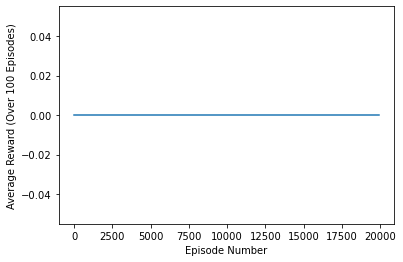

Best Average Reward over 100 Episodes:  0.0


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [29]:
q_learning(env, total_episodes, epsilon = 1.0, gamma=0.95, plot_every=100)

## Part 5: Action in Action! 🕹️
- After training, the agent has develop a Q-table can be used to play FrozenLake. The Q-table tells agent which action to take in each state. 
- Run the code below to see our agent playing FrozenLake.

In [31]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("********************")
    print("EPISODE ", episode)
    for step in range(max_steps):
        action = np.argmax(qtable[state,:])# Take the action (index) with maximum expected future reward given that state
        new_state, reward, done, info = env.step(action)
        if done:
            env.render()
            if new_state == 15:
                print("Goal 🏅")
            else:
                print("Hole 💀")            
            # We print the number of step it took.
            print("Number of steps", step)            
            break
        state = new_state
env.close()

********************
EPISODE  0
  (Left)
SFFF
FHFH
FFFH
HFFG
Hole 💀
Number of steps 15
********************
EPISODE  1
  (Left)
SFFF
FHFH
FFFH
HFFG
Hole 💀
Number of steps 10
********************
EPISODE  2
  (Left)
SFFF
FHFH
FFFH
HFFG
Hole 💀
Number of steps 38
********************
EPISODE  3
  (Left)
SFFF
FHFH
FFFH
HFFG
Hole 💀
Number of steps 7
********************
EPISODE  4
  (Left)
SFFF
FHFH
FFFH
HFFG
Hole 💀
Number of steps 8
